### LIBRARIES

In [ ]:
import yfinance as yf

### DATA COLLECTION

In [ ]:
usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

C:\Users\sride\AppData\Local\Temp\ipykernel_18080\1358373588.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')
[*********************100%***********************]  1 of 1 completed


In [ ]:
type(usd_inr)

pandas.core.frame.DataFrame

In [ ]:
usd_inr.head(10)

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0
2024-02-05,82.985298,83.091003,82.898003,82.999298,0
2024-02-12,83.009598,83.123901,82.880997,83.014503,0
2024-02-19,82.872299,83.051598,82.813004,83.015999,0


In [ ]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [ ]:
usd_inr.reset_index(inplace=True) # give index to the existing dataset

In [ ]:
usd_inr.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,2024-01-01,83.240601,83.360298,83.035004,83.248596,0
1,2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2,2024-01-15,83.160599,83.230797,82.809998,82.872101,0
3,2024-01-22,83.146103,83.222504,81.513702,83.124702,0
4,2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [ ]:
#Select the necessary columns
usd_inr=usd_inr[['Date','Close']]
usd_inr.columns=['Data','USD_INR']  #nameing the columns

In [ ]:
usd_inr.head()

,Data,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


In [ ]:
# Dependent variable y
gold_rate=yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')

C:\Users\sride\AppData\Local\Temp\ipykernel_18080\1701890251.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_rate=yf.download('XAU', start='2024-01-01', end='2024-12-31', interval='1wk')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XAU']: YFPricesMissingError('possibly delisted; no price data found  (1wk 2024-01-01 -> 2024-12-31)')


 ### Webscraping using BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL of the page
url = "https://www.exchange-rates.org/precious-metals/gold-price/india/2024"

# Send a request to fetch the page content
response= requests.get(url)

# Parse the HTML content
soup= BeautifulSoup(response.text,"html.parser")

# Find all tables
tables= soup.find_all("table")

# Extract tables into DataFrame
dfs=[]
for table in tables:
    df=pd.read_html(str(table))[0] 
    dfs.append(df)   # it is in list format

# Convert it into single combined DataFrame
final_df=pd.concat(dfs, ignore_index=True)
final_df.tail()

C:\Users\sride\AppData\Local\Temp\ipykernel_18080\2599129675.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(table))[0]
C:\Users\sride\AppData\Local\Temp\ipykernel_18080\2599129675.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(table))[0]
C:\Users\sride\AppData\Local\Temp\ipykernel_18080\2599129675.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(table))[0]
C:\Users\sride\AppData\Local\Temp\ipykernel_18080\2599129675.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a l

,"(January 2024, Unnamed: 0_level_1)","(January 2024, Gold Price (24 Karat))","(January 2024, Gold Price (22 Karat))","(January 2024, Gold Price (18 Karat))","(January 2024, Gold Price (14 Karat))","(January 2024, Gold Price (10 Karat))","(January 2024, Gold Price/oz)",Gold Spot Prices,Today,Change
1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14K Gold Price per Gram,"₹5,343.51",17.1938
1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14K Gold Price per Kilogram,"₹5,343,508",17193.7600
1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10K Gold Price per Ounce,"₹118,715",381.9900
1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10K Gold Price per Gram,"₹3,816.79",12.2813
1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10K Gold Price per Kilogram,"₹3,816,792",12281.2600


#### Other way to get this data is by using excel and importing it

In [ ]:
gold_df=pd.read_csv(r"C:\Users\sride\Downloads\Gold vs USDINR.csv")

In [ ]:
gold_df.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


### DATA ANALYSIS AND CLEANING

In [ ]:
gold_df['Goldrate']=gold_df['Goldrate'].replace('₹','',regex=True).replace(',','',regex=True).astype(float)

In [ ]:
gold_df.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


#### EDA
- Handle missing values - No
- Handle Imbalanced dataset - No >> Applicable only for classification problems
- Handle outliers - Seen (2 outliers)
- Encode categorical features - No
- Normalization vs Standardisation - standardize

<Axes: ylabel='USD_INR'>

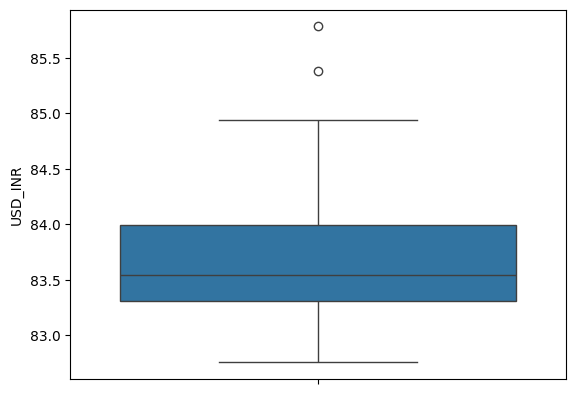

In [ ]:
import seaborn as sns
sns.boxplot(gold_df['USD_INR'])

In [ ]:
gold_df['USD_INR'].max()

np.float64(85.78659821)

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

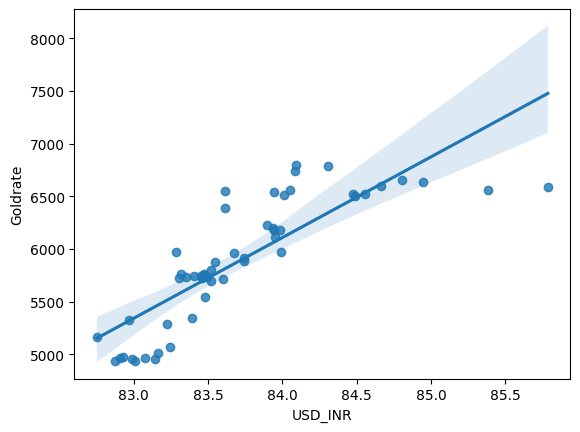

In [ ]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_df)
#regplot- helps to visualize the linear line between to attributes

### MODEL TRAINING

In [ ]:
X=gold_df[['USD_INR']]
y=gold_df[['Goldrate']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((47, 1), (6, 1))

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)  
# fit- uses the formula and finds the value
# transform- applies the value to the dataset
X_test_scaled=scaler.transform(X_test)             

In [ ]:
X_test_scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
lr.coef_   # m value

array([[469.20755762]])

In [ ]:
lr.intercept_  # b value

array([5878.57340426])

In [ ]:
# y = mx + b
m= lr.coef_[0][0]
b= lr.intercept_[0]
m,b

(np.float64(469.2075576153299), np.float64(5878.573404255313))

In [ ]:
X_train_predict= lr.predict(X_train_scaled)

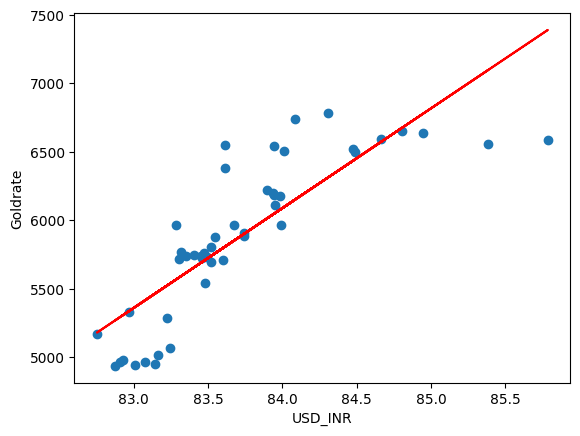

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.plot(X_train,X_train_predict, color= 'r')  # predicted line
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")
plt.show()

In [ ]:
y_test_predicted= lr.predict(X_test_scaled)

In [ ]:
y_test_predicted

array([[5702.05943009],
       [6127.70978702],
       [6494.65358787],
       [5645.83421639],
       [6155.1992781 ],
       [5348.52935023]])

In [ ]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


**Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_test_predicted)

141948.22993388725

**Accuracy**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_predicted)*100

69.7171694089544

### HYPERPARAMETER TUNING  
(Finding best set of hyperparameters for a model to improve its performance)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_space = { 'copy_X' : [True,False],
                'fit_intercept': [True,False], 
                'n_jobs': [1,5,10,15,None], 
                'positive': [True,False]}

In [ ]:
search = RandomizedSearchCV(lr,param_space,n_iter=50,cv=5) 
# cv- cross validation

In [ ]:
search.fit(X_train,y_train)

C:\Users\sride\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [ ]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [ ]:
tuned_lr= LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [ ]:
tuned_lr.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=1, positive=True)

In [ ]:
tuned_lr.coef_

array([[469.20755762]])

In [ ]:
tuned_lr.intercept_

array([5878.57340426])

In [ ]:
y_test_predict_tuned=tuned_lr.predict(X_test_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

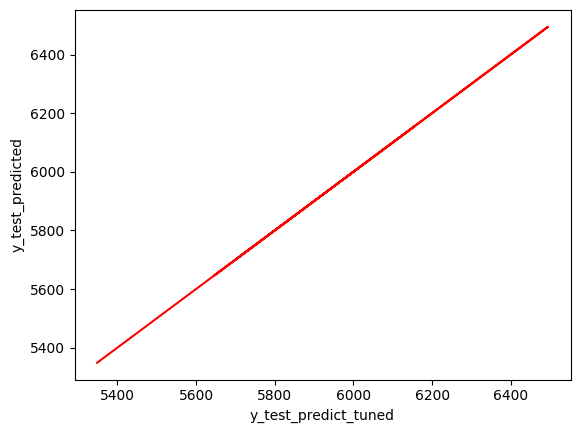

In [ ]:
plt.plot(y_test_predict_tuned,y_test_predicted,color='r')
plt.xlabel("y_test_predict_tuned")
plt.ylabel("y_test_predicted")
plt.show

- This graphs tells us that the prediction before and after tuning the model is almost same.
- Tuning didn't help us much in this case.

In [ ]:
r2_score(y_test,y_test_predict_tuned)*100

69.71716940895443

- Accuracy is also almost same

### MLOPS

- Save the model
- Build interface
- Connect Model & interface

**1. Save the model**

In [ ]:
import pickle 
# Used to save python objects to a file
# Can be shared, deployed easily
# Reuse it later exactly as it was

In [ ]:
pickle.dump(lr, open('lr.pkl','wb'))  # wb- write in binary
# Dumps the lr data into the file

In [ ]:
lr_reloaded= pickle.load(open('lr.pkl','rb'))
# Loads the data from the file to the variable in read mode

In [ ]:
lr_reloaded.intercept_ 

array([5878.57340426])

In [ ]:
pickle.dump(scaler,open('scaler.pkl','wb'))
# Dumps scaler data into the file

**2. Build Interface**

In [ ]:
!pip install gradio

In [ ]:
import numpy as np
def calculate_gold_rate(usd_inr):
    scaled_input = scaler.transform(np.array(usd_inr).reshape(1,-1))
    # scikit-learn scalers expect 2D input:
    return round(lr.predict(scaled_input)[0][0],2)

In [ ]:
calculate_gold_rate(80)

C:\Users\sride\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(3171.57)

In [ ]:
import gradio as gr

demo = gr.Interface(
    fn=calculate_gold_rate,
    inputs=["number"],
    outputs=["number"],
    title= "How much is 1gm Gold now?"
 )
demo.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


C:\Users\sride\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sride\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sride\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio\flagged\dataset2.csv


C:\Users\sride\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
